In [10]:
## Wp2a Roast analysis - Plots for publication - Aloi Davide (PhD student - University of Birmingham)

import os
from nilearn import image, plotting
from nilearn.image import new_img_like
import matplotlib as mpl
import matplotlib.pyplot as plt

results_folder = 'D:\\roast-chapter3\\wp2a_results\\' # where wp2a e-field maps, current density maps and brain masks were saved

emag_scans = image.load_img(os.path.join(results_folder + 'wp2a_all_emag_maps.nii'))
cd_scans = image.load_img(os.path.join(results_folder + 'wp2a_all_cd_maps.nii'))
mask_scans = image.load_img(os.path.join(results_folder + 'wp2a_all_masks_maps.nii'))

C:\Users\davide\anaconda3\lib\site-packages\nilearn\datasets\__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


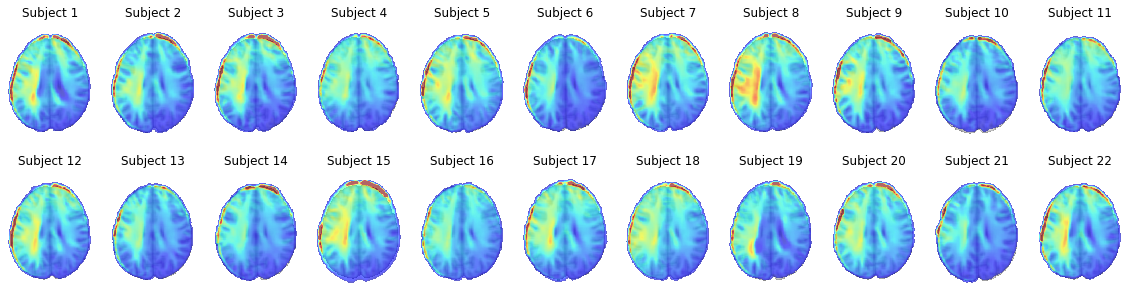

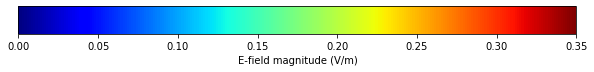

In [12]:
## Electric field magnitude maps (smoothed) plot

save_plt = True
fig, axes = plt.subplots(nrows = 2, ncols = 11, figsize = (20,5)) # Create Mega plot with electric current maps
vmin, vmax = 0, 0.35 # Color map min and max. 

subject = 0
for ax in axes.flatten():
    display = plotting.plot_roi(new_img_like(emag_scans, emag_scans.get_fdata()[:,:,:,subject]),
              #bg_img = bck_img_map_smoothed,
              display_mode = 'z',
              annotate = False,
              dim = 0.5,
              cmap = 'jet',
              cut_coords = [28],
              threshold = 0.01,
              vmin = vmin,
              vmax = vmax,
              alpha = 0.60,
              draw_cross = False,
              black_bg = False,
              axes = ax)
    ax.title.set_text('Subject ' + str(subject + 1))
    subject += 1 # Move to next subject

    if save_plt:
        plt.savefig('wp2a_e-mag_all.jpg', format='jpg', dpi=400)

# Colorbar for the above brain plots

fig, ax = plt.subplots(figsize=(10, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.jet
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='E-field magnitude (V/m)')    
if save_plt:
    plt.savefig('wp2a_e-mag_all_cbar.jpg', format='jpg', dpi=400)

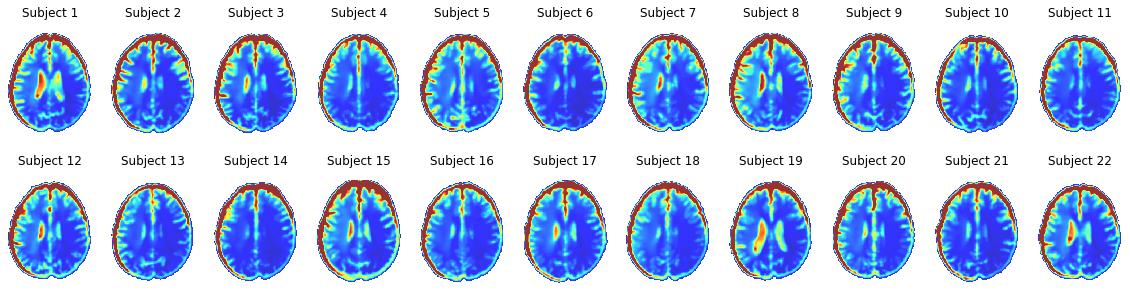

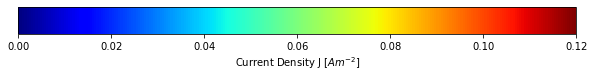

In [14]:
## Current density maps plot

save_plt = True
fig, axes = plt.subplots(nrows = 2, ncols = 11, figsize = (20,5)) # Create Mega plot with current density maps

# Current density color map vmin and vmax
cd_vmin = 0
cd_vmax = 0.12
# Due to the smoothing you're going to have some small values of current density around the brain, which we won't show
cd_threshold = 0.005 

subject = 0
for ax in axes.flatten():
    display = plotting.plot_roi(new_img_like(emag_scans, cd_scans.get_fdata()[:,:,:,subject]),
              bg_img = None,
              display_mode = 'z',
              annotate = False,
              #dim = 0.5,
              cmap = 'jet',
              cut_coords = [28],
              threshold = cd_threshold,
              vmin = cd_vmin,
              vmax = cd_vmax,
              alpha = 0.80,
              draw_cross = False,
              black_bg = False,
              axes = ax)
    ax.title.set_text('Subject ' + str(subject + 1))
    subject += 1 # Move to next subject

    if save_plt:
        plt.savefig('wp2a_cd_all.jpg', format='jpg', dpi=400)

# Colorbar for the above brain plots

fig, ax = plt.subplots(figsize=(10, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.jet
norm = mpl.colors.Normalize(vmin=cd_vmin, vmax=cd_vmax)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Current Density J [$Am^{-2}$]')    
if save_plt:
    plt.savefig('wp2a_cd_all_cbar.jpg', format='jpg', dpi=400)